## Importing Dependencies

In [3]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
from sklearn.preprocessing import LabelEncoder
import xml.etree.ElementTree as ET
import sklearn
import itertools
import cv2
import scipy
import os
import csv
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the Dataset


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading Train and Test Data (with labels)

In [5]:
train_dir ="drive/MyDrive/dataset2-master/images/TRAIN"
test_dir ="drive/MyDrive/dataset2-master/images/TEST"

### Preprocessing

#### Plot Data

In [6]:
dict_characters = {1:'NEUTROPHIL',2:'EOSINOPHIL',3:'MONOCYTE',4:'LYMPHOCYTE'}
dict_characters2 = {0:'Mononuclear',1:'Polynuclear'}

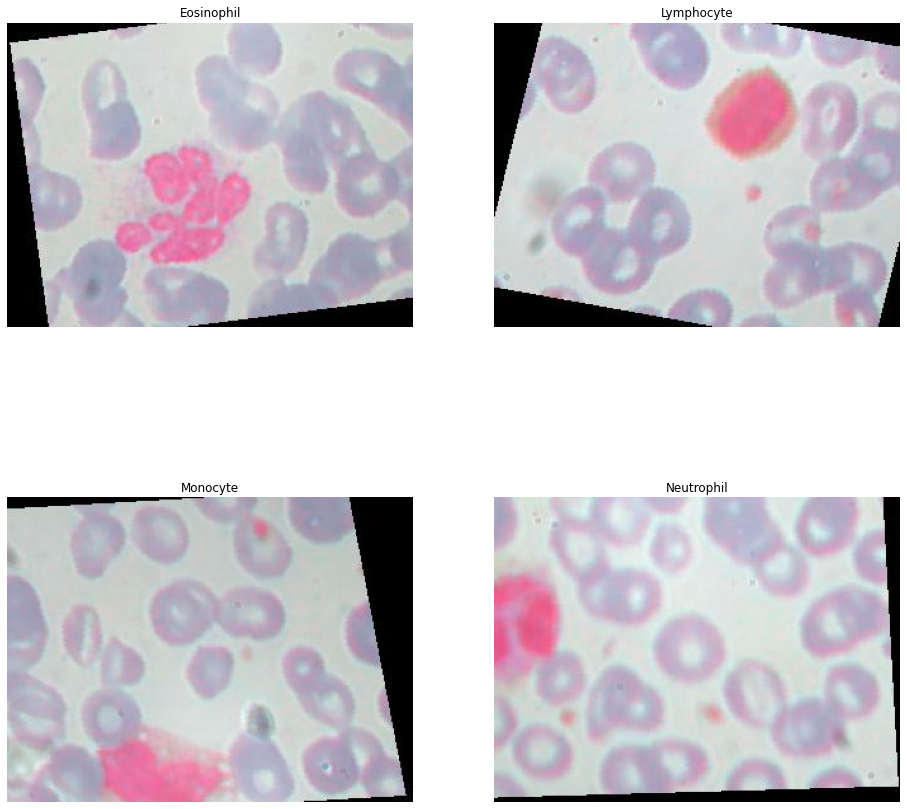

In [9]:
# Plot Image
def plotImage(image_location):
    image = cv2.imread(image_name)
    plt.imshow(image)
    return
image_name = f"{train_dir}/EOSINOPHIL/_0_207.jpeg"
plt.figure(figsize=(16,16))
plt.subplot(221)
plt.title('Eosinophil')
plt.axis('off') 
plotImage(image_name)
image_name = f"{train_dir}/LYMPHOCYTE/_0_204.jpeg"
plt.subplot(222)
plt.title('Lymphocyte')
plt.axis('off') 
plotImage(image_name)
image_name = f"{train_dir}/MONOCYTE/_0_180.jpeg"
plt.subplot(223)
plt.title('Monocyte')
plt.axis('off') 
plotImage(image_name)
plt.subplot(224)
image_name = f"{train_dir}/NEUTROPHIL/_0_292.jpeg"
plt.title('Neutrophil')
plt.axis('off') 
plotImage(image_name)

#### Label counts

[  3  88  33  21 207]


<ipython-input-10-0b9050e78b38>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(('', 'Basophil', 'Eosinophil', 'Lymphocyte', 'Monocyte', 'Neutrophil'))


Text(0, 0.5, 'Counts')

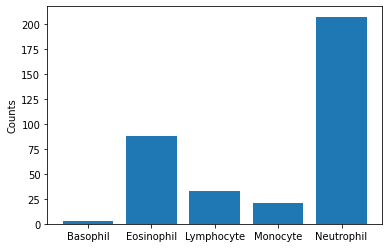

In [10]:
reader = csv.reader(open("/content/drive/MyDrive/dataset2-master/labels.csv"))
# skip the header
next(reader)
X3 = []
y3 = []
for row in reader:
    label = row[2]
    if len(label) > 0 and label.find(',') == -1:
        y3.append(label)
y3 = np.asarray(y3)
encoder = LabelEncoder()
encoder.fit(y3)
encoded_y = encoder.transform(y3)
counts = np.bincount(encoded_y)
print(counts)
fig, ax = plt.subplots()
plt.bar(list(range(5)), counts)
ax.set_xticklabels(('', 'Basophil', 'Eosinophil', 'Lymphocyte', 'Monocyte', 'Neutrophil'))
ax.set_ylabel('Counts')

Data is imbalanced, this needs to be countered before working.